In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#設定 data path
app_train = pd.read_csv(r'C:\Users\user\Desktop\ML_marathon\D4\application_train.csv')

In [3]:
t = app_train.shape
t

(307511, 122)

In [4]:
# 秀出資料欄位的類型與數量
dtype_df = app_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,int64,41
1,float64,65
2,object,16


Numbers of remain columns 73


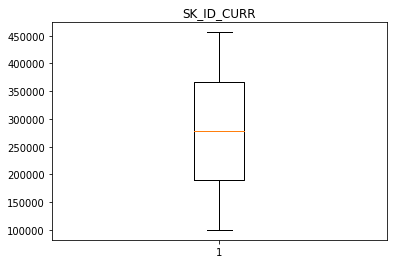

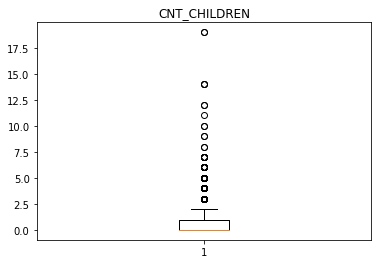

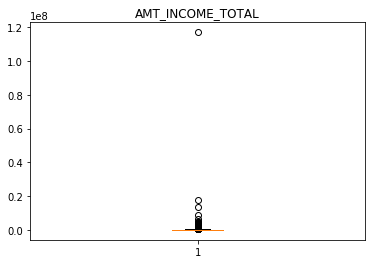

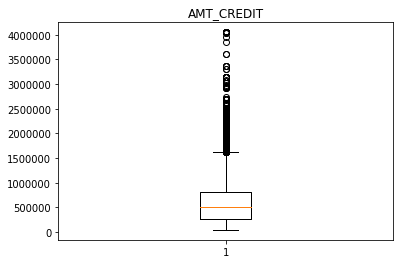

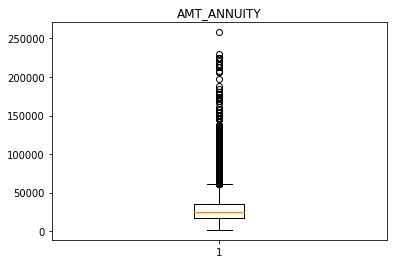

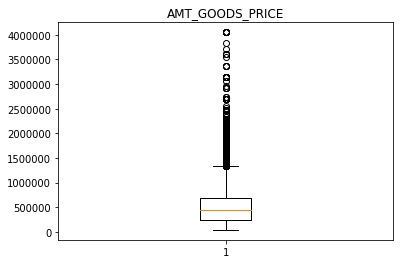

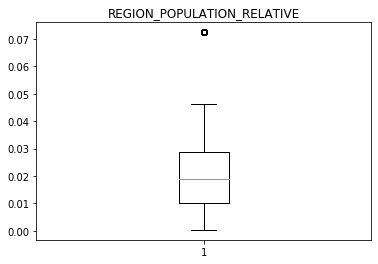

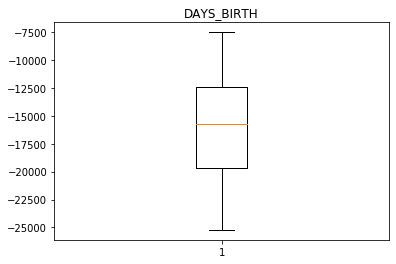

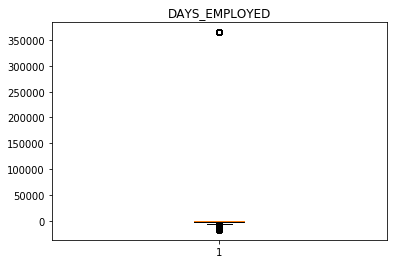

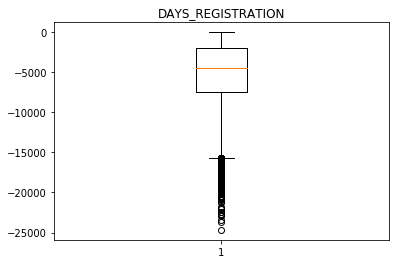

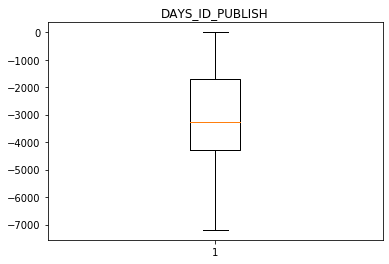

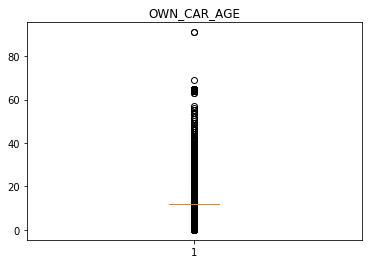

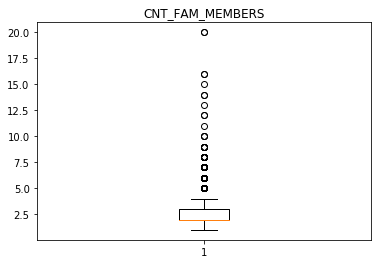

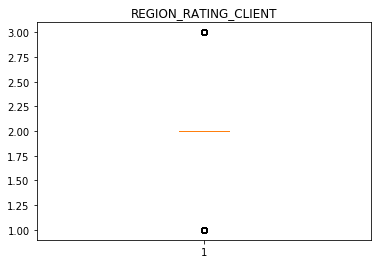

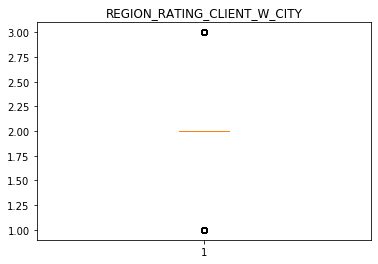

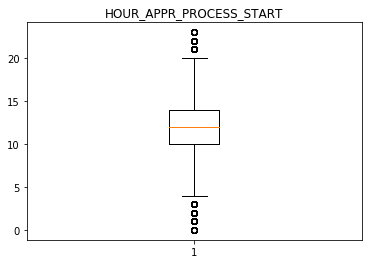

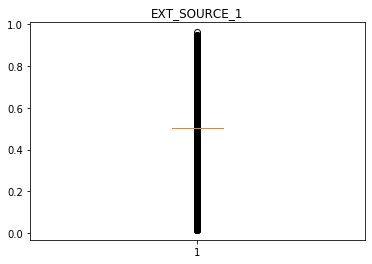

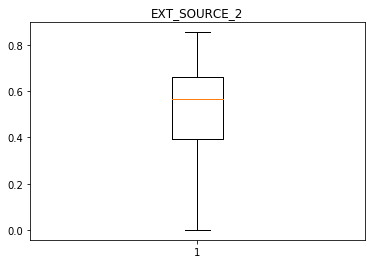

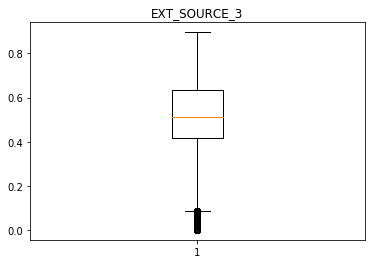

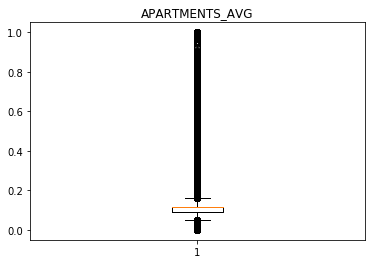

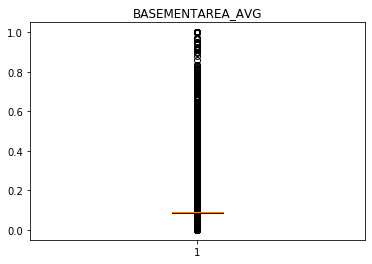

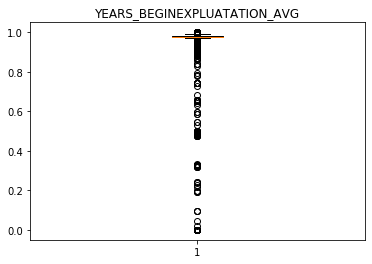

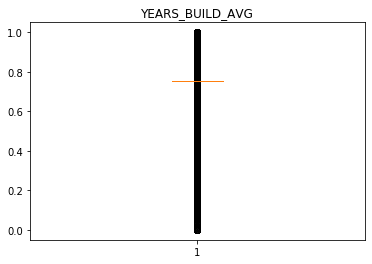

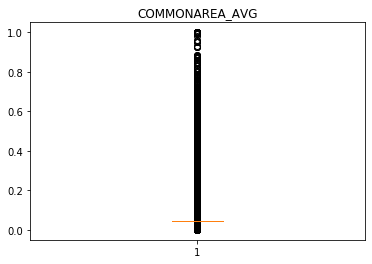

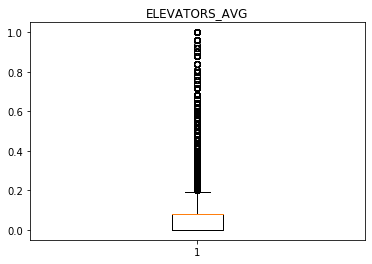

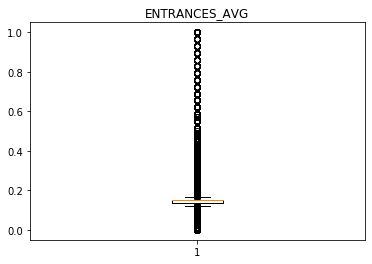

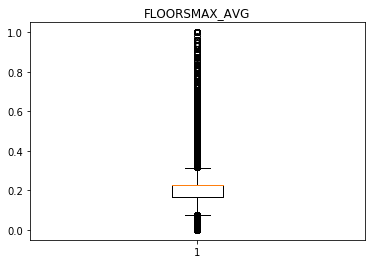

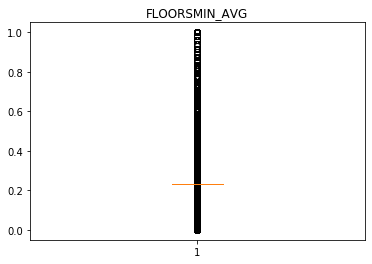

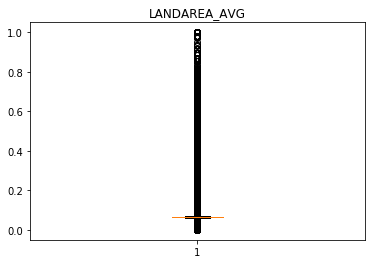

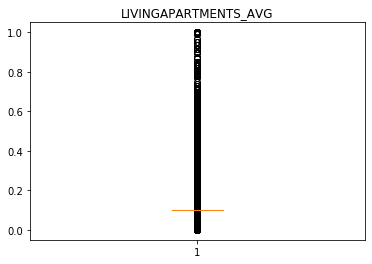

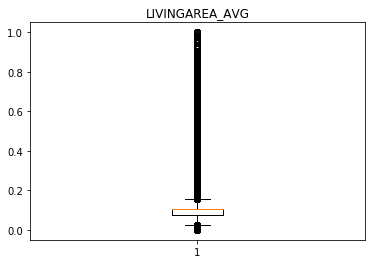

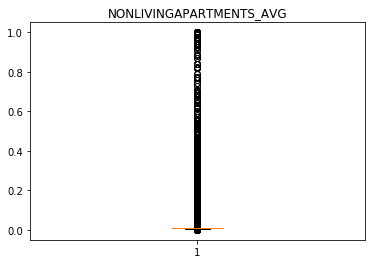

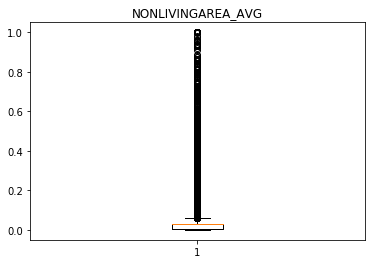

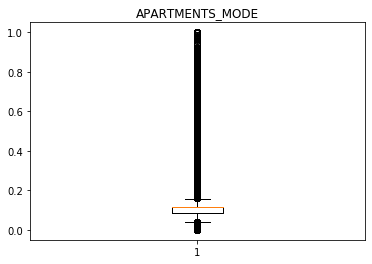

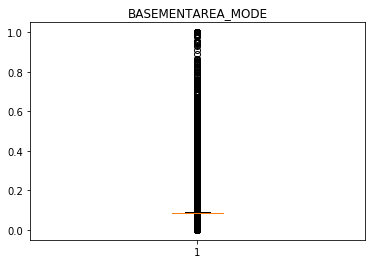

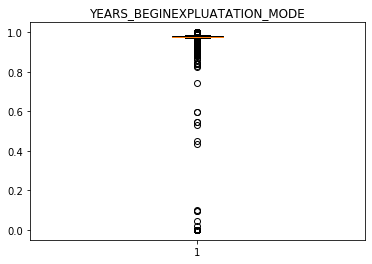

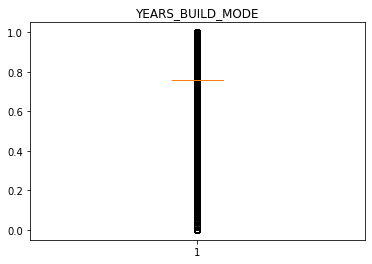

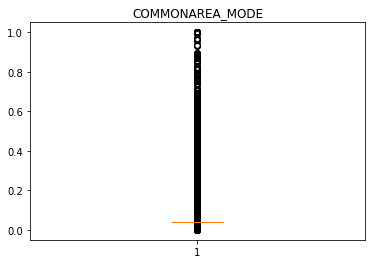

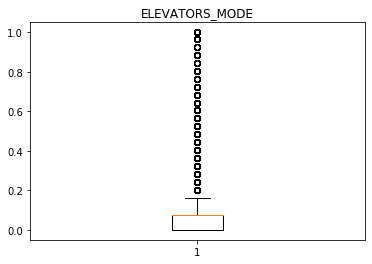

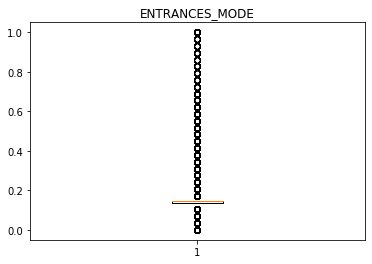

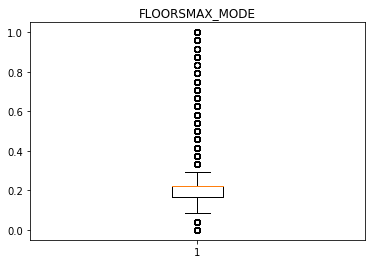

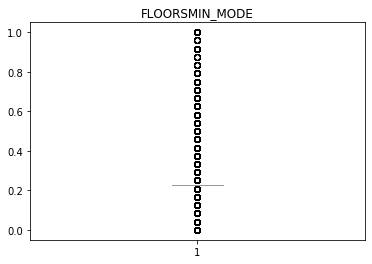

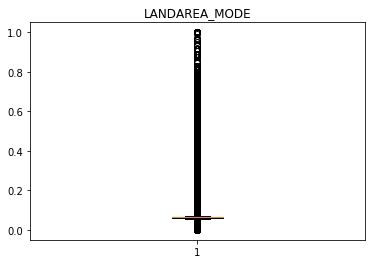

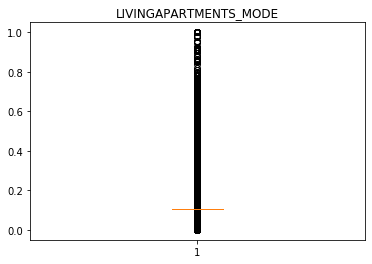

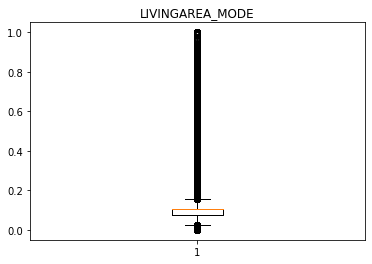

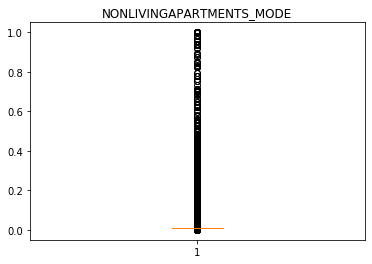

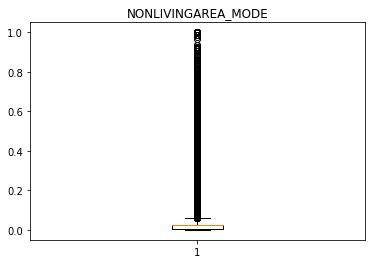

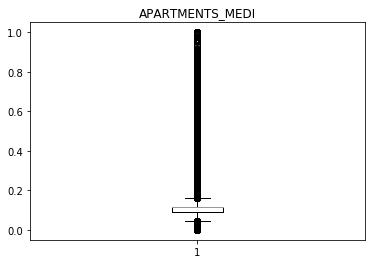

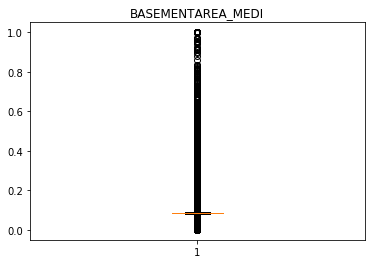

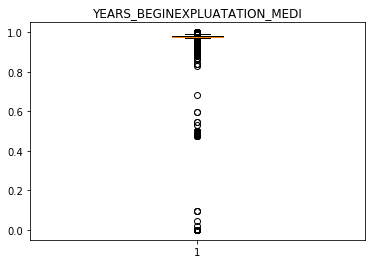

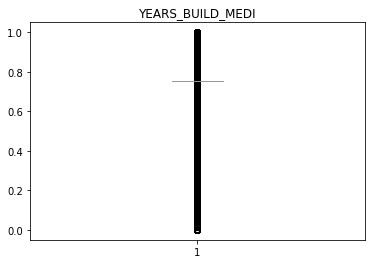

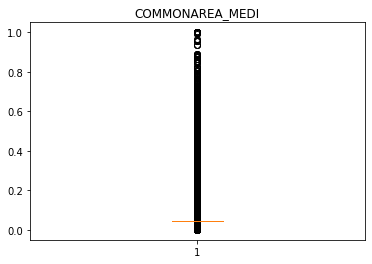

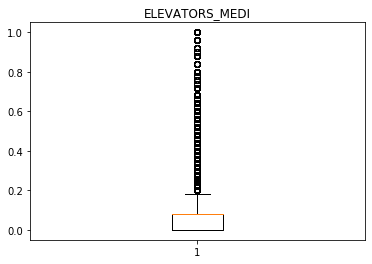

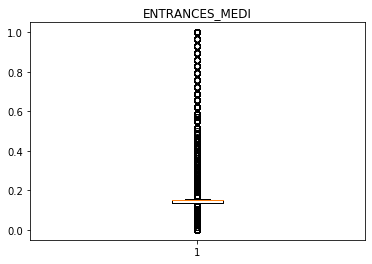

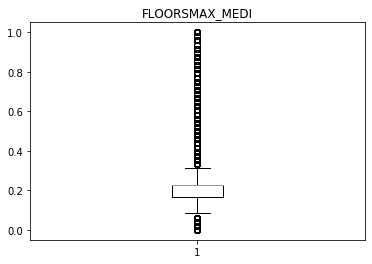

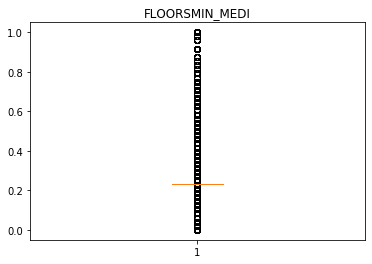

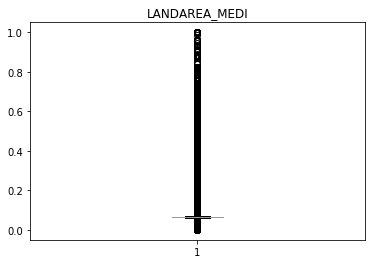

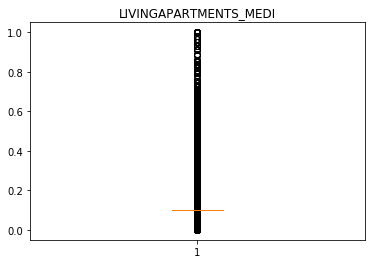

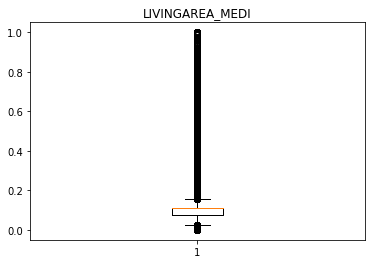

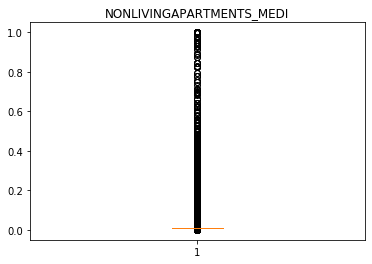

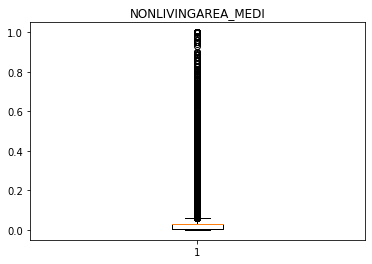

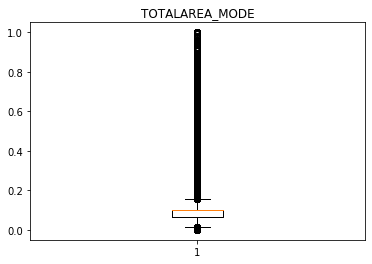

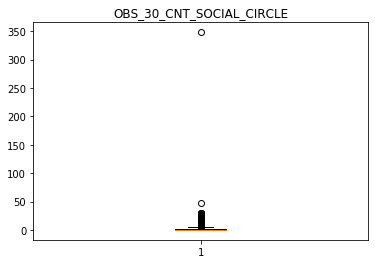

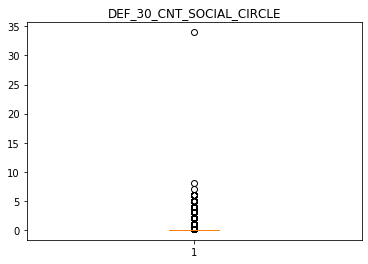

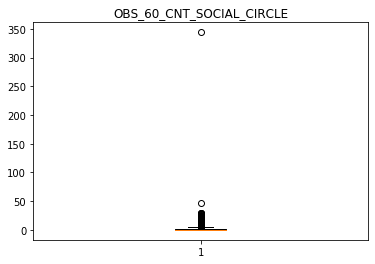

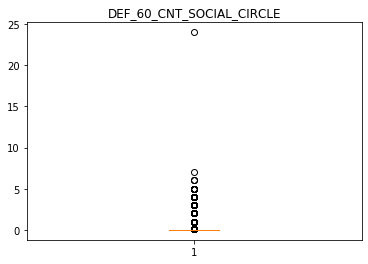

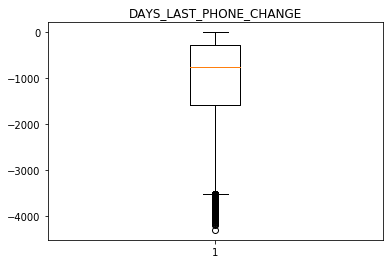

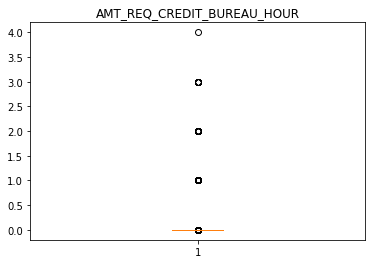

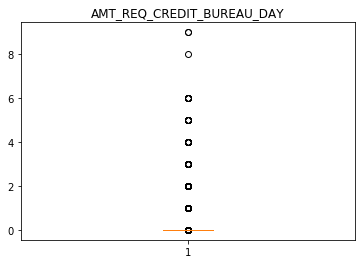

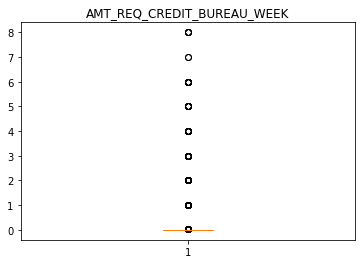

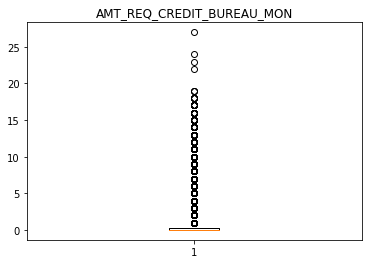

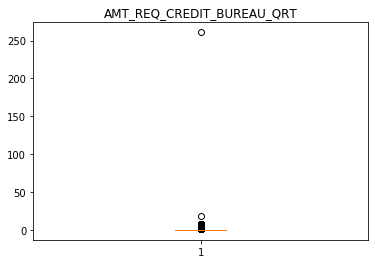

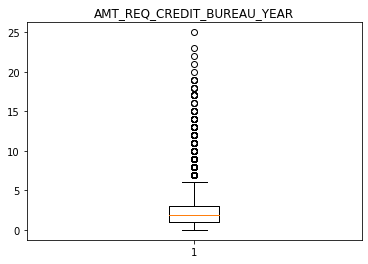

In [5]:
# 先篩選數值型的欄位
dtype_select = []
for dtype in app_train.dtypes:
    if dtype != 'object':
        dtype_select.append(dtype)
    else:
        continue;
      
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))]);

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns",len(numeric_columns))


# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    app_train[col].fillna(value = app_train[col].mean(), inplace=True)
    plt.boxplot(app_train[col])    #作圖
    plt.title(col)
    plt.show()


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


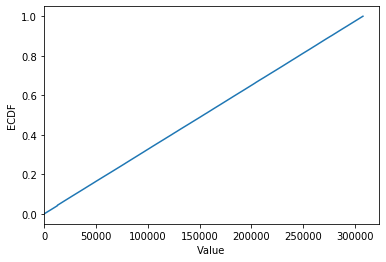

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


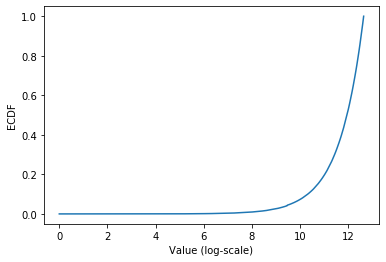

In [6]:

# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
cdf = app_train['AMT_INCOME_TOTAL'].cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


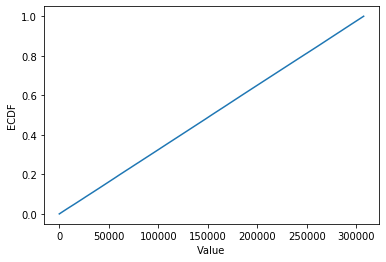

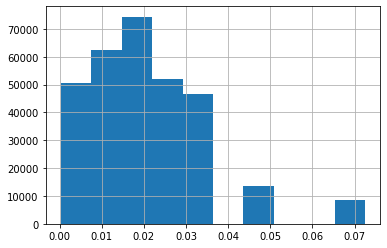

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
            ...  
0.001417      467
0.001333      235
0.000533       39
0.000938       28
0.000290        2
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

In [7]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train['REGION_POPULATION_RELATIVE'].cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    307511.000000
mean          1.405292
std           2.375849
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


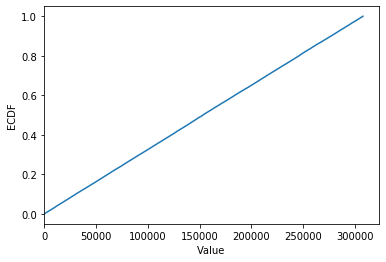

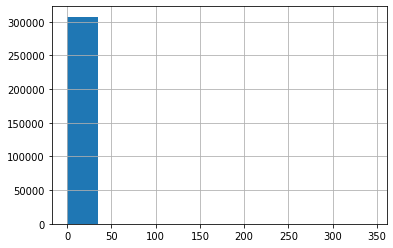

344.000000         1
47.000000          1
30.000000          1
29.000000          2
28.000000          1
27.000000          5
26.000000          1
25.000000         11
24.000000         12
23.000000         13
22.000000         20
21.000000         28
20.000000         30
19.000000         44
18.000000         49
17.000000         73
16.000000        137
15.000000        166
14.000000        238
13.000000        401
12.000000        620
11.000000        837
10.000000       1335
9.000000        1959
8.000000        2886
7.000000        4344
6.000000        6349
5.000000        9463
4.000000       13946
3.000000       20215
2.000000       29766
1.405292        1021
1.000000       48870
0.000000      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [8]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train['OBS_60_CNT_SOCIAL_CIRCLE'].cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

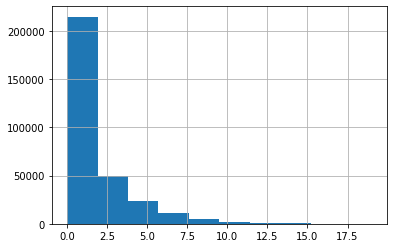

In [9]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = app_train[app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20].index
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'
app_train.loc[loc_a, loc_b].hist()
plt.show()